## Tarefas

### 1- Analise de Residuos
Utilize a funcao plo_regress_exog para diagnosticar a distrubuição dos residuos em relação a uma das varáveis indenpendentes

In [10]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# carregar os dados
data= pd.read_csv('consumo_energia.csv')

In [3]:
data.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [4]:
data.rename(columns={'Lagging_Current_Power_Factor':'Atrasado','Leading_Current_Power_Factor':'Adiantado','Load_Type':'tipo_carga','CO2(tCO2)':'CO2'},inplace=True)
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Atrasado,Adiantado,NSM,WeekStatus,Day_of_week,tipo_carga
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
#definindo as variavel independente e dependentes
X = data[['Adiantado','Atrasado','CO2']]
y = data['Usage_kWh']
X.head()

,Adiantado,Atrasado,CO2
0,100.0,73.21,0.0
1,100.0,66.77,0.0
2,100.0,70.28,0.0
3,100.0,68.09,0.0
4,100.0,64.72,0.0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adiantado  35040 non-null  float64
 1   Atrasado   35040 non-null  float64
 2   CO2        35040 non-null  float64
dtypes: float64(3)
memory usage: 821.4 KB


In [11]:
#adicionando as constantes ao modelo
X= sm.add_constant(X)

In [12]:
#ajustar modelo de regressão linear multipla
modelo=sm.OLS(y,X)
result= modelo.fit()

In [13]:
modelo_sample= sm.OLS(y.sample(50,random_state=0),X.sample(50,random_state=0))
result_sample= modelo_sample.fit()

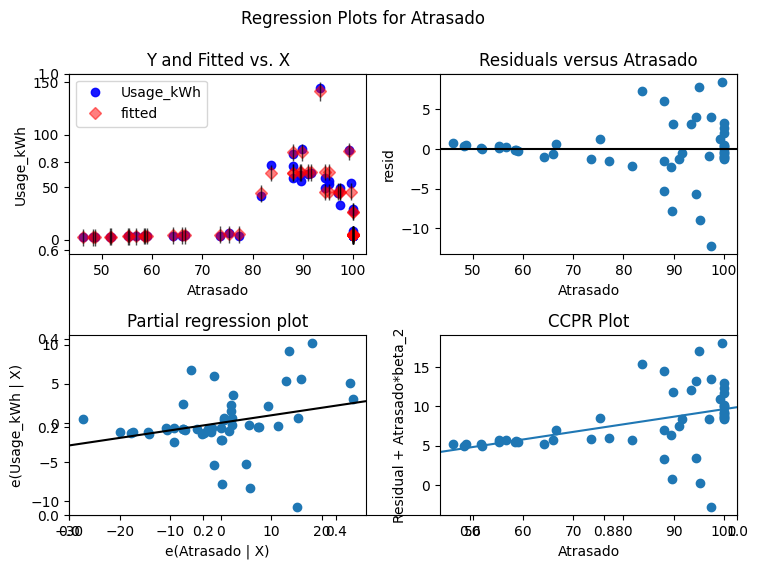

In [14]:
#diagnosticar e validar o modelo
#plotar residuos
fig,ax =plt.subplots(figsize=(8,6))
sm.graphics.plot_regress_exog(result_sample,'Atrasado',fig=fig)
plt.tight_layout()

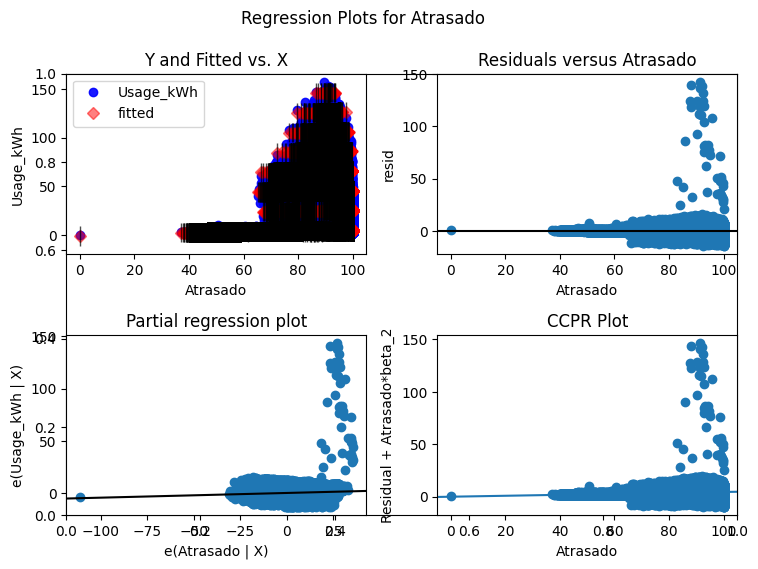

In [15]:
# Diagnosticar e validar os modelos
#plotar os residuos
fig , ax = plt.subplots(figsize=(8,6))
sm.graphics.plot_regress_exog(result,'Atrasado',fig=fig)
plt.tight_layout()

### Verificar suposições
teste de Breush-Pagan para verificar se há herterocedasticidade nos resíduos do modelo de regressão linear múltipla

In [ ]:
het_test= sm.het_